In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = {
    'tra':
    pd.read_csv('input/air_visit_data.csv'),
    'as':
    pd.read_csv('input/air_store_info.csv'),
    'hs':
    pd.read_csv('input/hpg_store_info.csv'),
    'ar':
    pd.read_csv('input/air_reserve.csv'),
    'hr':
    pd.read_csv('input/hpg_reserve.csv'),
    'id':
    pd.read_csv('input/store_id_relation.csv'),
    'tes':
    pd.read_csv('input/sample_submission.csv'),
    'hol':
    pd.read_csv('input/date_info.csv').rename(columns={
        'calendar_date' : 'visit_date'
    })
}

In [15]:
plt.rcParams['figure.figsize'] = 16 , 8

In [17]:
data['hol'].head()

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [19]:
data['tra'].head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [23]:
air_visit_date = pd.merge(data['tra'],data['hol'],how = 'left' , left_on = 'visit_date' , right_on = 'visit_date')

In [24]:
air_visit_date.loc[air_visit_date['holiday_flg'] != 0].sort_values('visitors',ascending=False).head(10)

,air_store_id,visit_date,visitors,day_of_week,holiday_flg
28265,air_df554c4527a1cfe6,2016-12-30,205,Friday,1
138181,air_47070be6093f123e,2016-10-10,201,Monday,1
180062,air_8e492076a1179383,2017-01-02,199,Monday,1
28264,air_df554c4527a1cfe6,2016-12-29,182,Thursday,1
8857,air_7514d90009613cd6,2016-12-31,181,Saturday,1
8855,air_7514d90009613cd6,2016-12-29,168,Thursday,1
48491,air_fe58c074ec1445ea,2016-04-29,168,Friday,1
231420,air_5e939e005bd34633,2016-03-20,168,Sunday,1
8335,air_37189c92b6c761ec,2016-01-11,167,Monday,1
189786,air_cadf9cfb510a1d78,2016-05-05,167,Thursday,1


In [41]:
day_wise_df = air_visit_date.loc[air_visit_date['holiday_flg'] != 0].groupby('day_of_week').agg(sum)

In [42]:
sorter = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
# print(sorterIndex)
# print(day_wise_df.sort_values('visitors',ascending=False))
day_wise_df['day_id'] = day_wise_df.index
# print(day_wise_df['day_id'])
day_wise_df['day_id'] = day_wise_df['day_id'].map(sorterIndex)
# print(day_wise_df['day_id'])

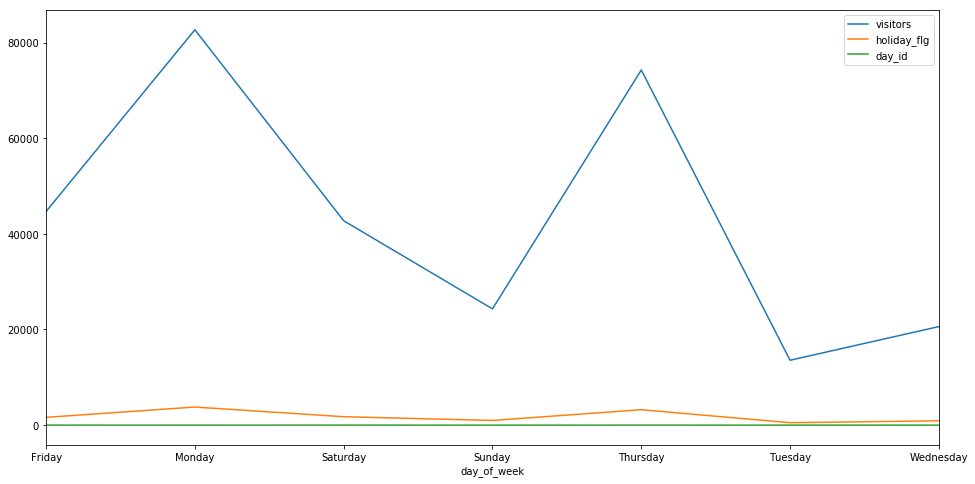

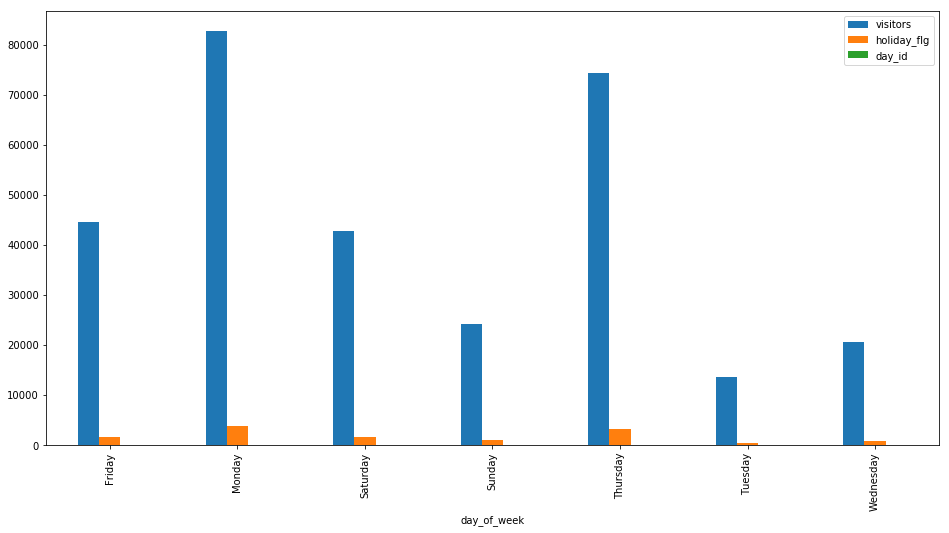

In [43]:
day_wise_df.plot()
day_wise_df.plot(kind = 'bar')

In [44]:
day_wise_df

,visitors,holiday_flg,day_id
day_of_week,,,
Friday,44667,1628,5
Monday,82665,3780,1
Saturday,42738,1756,6
Sunday,24310,977,0
Thursday,74258,3221,4
Tuesday,13568,507,2
Wednesday,20604,906,3


In [45]:
day_wise_df.head()

,visitors,holiday_flg,day_id
day_of_week,,,
Friday,44667,1628,5
Monday,82665,3780,1
Saturday,42738,1756,6
Sunday,24310,977,0
Thursday,74258,3221,4


In [46]:
day_wise_df.sort_values('day_id',inplace=True)

In [47]:
day_wise_df

,visitors,holiday_flg,day_id
day_of_week,,,
Sunday,24310,977,0
Monday,82665,3780,1
Tuesday,13568,507,2
Wednesday,20604,906,3
Thursday,74258,3221,4
Friday,44667,1628,5
Saturday,42738,1756,6


In [48]:
air_visit_date.loc[air_visit_date['holiday_flg'] == 0].sort_values('visitors',ascending=False).head(10)

,air_store_id,visit_date,visitors,day_of_week,holiday_flg
85314,air_cfdeb326418194ff,2017-03-08,877,Wednesday,0
214825,air_8c3175aa5e4fc569,2017-04-18,777,Tuesday,0
72836,air_f2985de32bb792e0,2016-07-10,675,Sunday,0
172123,air_eca5e0064dc9314a,2016-08-30,627,Tuesday,0
143894,air_43d577e0c9460e64,2016-01-24,514,Sunday,0
167504,air_9828505fefc77d75,2016-11-19,409,Saturday,0
147739,air_e42bdc3377d1eee7,2016-12-14,372,Wednesday,0
151243,air_cb083b4789a8d3a2,2016-01-14,369,Thursday,0
141539,air_07bb665f9cdfbdfb,2016-08-07,351,Sunday,0
200611,air_c6aa2efba0ffc8eb,2017-01-23,348,Monday,0


In [49]:
day_wise_no_holiday_df = air_visit_date.loc[air_visit_date['holiday_flg'] == 0].groupby('day_of_week').agg(sum)

In [50]:
day_wise_no_holiday_df

,visitors,holiday_flg
day_of_week,,
Friday,886341,0
Monday,461537,0
Saturday,990390,0
Sunday,691676,0
Thursday,644729,0
Tuesday,622894,0
Wednesday,687276,0
